In [7]:
import pandas as pd
import numpy as np

# 🏭 Simulated warehouse stock level data over 10 days
data = {
    'Date': pd.date_range(start='2025-08-01', periods=10, freq='D'),
    
    # 👕 Unique item code for a SKU being tracked
    'Item_ID': ['A101'] * 10,
    
    # 📦 Stock level in warehouse (some days data is missing due to system delays)
    'Stock_Level': [120, 115, np.nan, 110, 108, np.nan, 100, 98, 95, np.nan],
    
    # 🚚 Expected inbound shipments from suppliers (missing due to entry gaps)
    'Inbound_Shipment': [20, np.nan, 0, 10, 15, 5, np.nan, 0, 10, 5],
    
    # 🛒 Binary flag: 1 = reorder placed; 0 = no reorder; NaN = info missing
    'Reorder_Flag': [0, 0, 1, 0, 0, 1, 0, np.nan, 0, 1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Show first few rows
df


,Date,Item_ID,Stock_Level,Inbound_Shipment,Reorder_Flag
0,2025-08-01,A101,120.0,20.0,0.0
1,2025-08-02,A101,115.0,NaN,0.0
2,2025-08-03,A101,NaN,0.0,1.0
3,2025-08-04,A101,110.0,10.0,0.0
4,2025-08-05,A101,108.0,15.0,0.0
5,2025-08-06,A101,NaN,5.0,1.0
6,2025-08-07,A101,100.0,NaN,0.0
7,2025-08-08,A101,98.0,0.0,NaN
8,2025-08-09,A101,95.0,10.0,0.0
9,2025-08-10,A101,NaN,5.0,1.0


In [9]:
# 🔍 Count total missing values per column
print("Missing Values Per Column:\n", df.isnull().sum())

# 📊 Calculate missing data percentage for each column
print("\nPercentage of Missing Data:\n", (df.isnull().sum() / len(df)) * 100)


Missing Values Per Column:
 Date                0
Item_ID             0
Stock_Level         3
Inbound_Shipment    2
Reorder_Flag        1
dtype: int64

Percentage of Missing Data:
 Date                 0.0
Item_ID              0.0
Stock_Level         30.0
Inbound_Shipment    20.0
Reorder_Flag        10.0
dtype: float64


In [11]:
# 🚫 Drop all rows that contain even one NaN value
df_dropna = df.dropna()

# Show result after dropping
df_dropna


,Date,Item_ID,Stock_Level,Inbound_Shipment,Reorder_Flag
0,2025-08-01,A101,120.0,20.0,0.0
3,2025-08-04,A101,110.0,10.0,0.0
4,2025-08-05,A101,108.0,15.0,0.0
8,2025-08-09,A101,95.0,10.0,0.0


In [13]:
# 🧮 Fill missing Stock_Level using mean
df_fill_mean = df.copy()
df_fill_mean['Stock_Level'] = df_fill_mean['Stock_Level'].fillna(df_fill_mean['Stock_Level'].mean())

# 📊 Fill Inbound_Shipment using median (less sensitive to outliers)
df_fill_mean['Inbound_Shipment'] = df_fill_mean['Inbound_Shipment'].fillna(df_fill_mean['Inbound_Shipment'].median())

df_fill_mean


,Date,Item_ID,Stock_Level,Inbound_Shipment,Reorder_Flag
0,2025-08-01,A101,120.000000,20.0,0.0
1,2025-08-02,A101,115.000000,7.5,0.0
2,2025-08-03,A101,106.571429,0.0,1.0
3,2025-08-04,A101,110.000000,10.0,0.0
4,2025-08-05,A101,108.000000,15.0,0.0
5,2025-08-06,A101,106.571429,5.0,1.0
6,2025-08-07,A101,100.000000,7.5,0.0
7,2025-08-08,A101,98.000000,0.0,NaN
8,2025-08-09,A101,95.000000,10.0,0.0
9,2025-08-10,A101,106.571429,5.0,1.0


In [15]:
# ⏩ Fill missing values by propagating last valid value forward
df_ffill = df.copy()
df_ffill = df_ffill.fillna(method='ffill')  # forward fill

# Show forward-filled DataFrame
df_ffill


C:\Users\User\AppData\Local\Temp\ipykernel_25340\1352748631.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df_ffill.fillna(method='ffill')  # forward fill


,Date,Item_ID,Stock_Level,Inbound_Shipment,Reorder_Flag
0,2025-08-01,A101,120.0,20.0,0.0
1,2025-08-02,A101,115.0,20.0,0.0
2,2025-08-03,A101,115.0,0.0,1.0
3,2025-08-04,A101,110.0,10.0,0.0
4,2025-08-05,A101,108.0,15.0,0.0
5,2025-08-06,A101,108.0,5.0,1.0
6,2025-08-07,A101,100.0,5.0,0.0
7,2025-08-08,A101,98.0,0.0,0.0
8,2025-08-09,A101,95.0,10.0,0.0
9,2025-08-10,A101,95.0,5.0,1.0


In [17]:
# 🛒 Fill Reorder_Flag with 0 (business rule: no reorder if unknown)
df_categorical = df.copy()
df_categorical['Reorder_Flag'] = df_categorical['Reorder_Flag'].fillna(0)

df_categorical


,Date,Item_ID,Stock_Level,Inbound_Shipment,Reorder_Flag
0,2025-08-01,A101,120.0,20.0,0.0
1,2025-08-02,A101,115.0,NaN,0.0
2,2025-08-03,A101,NaN,0.0,1.0
3,2025-08-04,A101,110.0,10.0,0.0
4,2025-08-05,A101,108.0,15.0,0.0
5,2025-08-06,A101,NaN,5.0,1.0
6,2025-08-07,A101,100.0,NaN,0.0
7,2025-08-08,A101,98.0,0.0,0.0
8,2025-08-09,A101,95.0,10.0,0.0
9,2025-08-10,A101,NaN,5.0,1.0


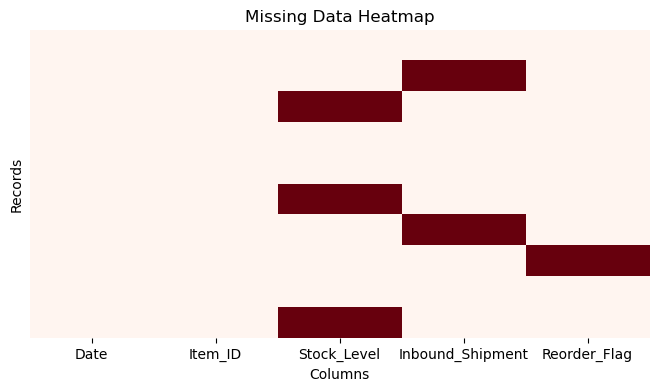

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔥 Heatmap to visualize where data is missing
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.xlabel("Columns")
plt.ylabel("Records")
plt.show()


In [ ]:
### 🧰 Table: Missing Data Handling Options in Supply Chain

| Strategy                | Method Example                                | Best Use Case                                                                 | Caution                                 |
|-------------------------|-----------------------------------------------|--------------------------------------------------------------------------------|------------------------------------------|
| **Drop Rows**           | `df.dropna()`                                 | When very few rows are missing; early EDA cleanup                              | Risk of data loss if many rows are affected |
| **Fill with Mean**      | `df['col'].fillna(df['col'].mean())`          | Numerical fields like `Stock_Level`, `Lead_Time`                              | Skewed by outliers                        |
| **Fill with Median**    | `df['col'].fillna(df['col'].median())`        | Numerical fields with skewed distribution, e.g., `Inbound_Shipment`           | May flatten variance                     |
| **Forward Fill (ffill)**| `df.fillna(method='ffill')`                   | Time-series data like daily stock or sensor readings                           | Error propagation possible                |
| **Backward Fill (bfill)**| `df.fillna(method='bfill')`                  | Filling historical gaps when future data is available                          | Can introduce data leakage                |
| **Custom Value Fill**   | `df['flag'].fillna(0)`                        | Binary/categorical fields like `Reorder_Flag`, `Is_Delayed`                    | Should reflect domain logic               |
| **Fill with Mode**      | `df['cat'].fillna(df['cat'].mode()[0])`       | Categorical columns like `Supplier_Region`, `Warehouse_Type`                   | Only works well if mode is meaningful     |
| **ML Imputation**       | `SimpleImputer(strategy='mean')`              | During model pipelines with `scikit-learn`                                     | Requires integration into pipeline        |

